In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
from Pipeline.AlgorithmResultParsers.DirecTagParser import DirecTagParser

direcTag_df = DirecTagParser("/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/BD7_Thermo_Pool52_HCD/DirecTag/Run_1/01640c_BD7-Thermo_SRM_Pool_52_01_01-3xHCD-1h-R2.tags", 25).parse(remove_invalid_tags=False)

In [13]:
direcTag_df = direcTag_df.groupby("ID")["Predicted"].apply(list)
print(direcTag_df)

ID
7                                                   [GSHT]
10                                [GSHP, 0GSH, A0GS, 0GSM]
11                                                  [GSHP]
13                                                  [GSHP]
63                                            [HSIV, SHSI]
                               ...                        
48971                                               [WPN0]
48972    [FAII, AIIH, DFAI, FAIH, VDFA, AIHI, QEIT, QEP...
48973                             [AIIH, AIHI, FAII, FAIH]
48974                                         [IV0G, IV0A]
48993                                               [IDVI]
Name: Predicted, Length: 35143, dtype: object


In [20]:
direcTag_scored_df = pd.read_csv("/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_DirecTag_1.tsv", sep="\t", header=0)
direcTag_scored_df = direcTag_scored_df.groupby("ID")["Similarity"].apply(list)
print(direcTag_scored_df)

ID
7                                                   [0.75]
10                                                   [1.0]
11                                                   [1.0]
13                                                   [1.0]
185                                                 [0.75]
                               ...                        
48898                                                [0.5]
48915    [1.0, 0.5, 1.0, 1.0, 0.75, 0.75, 0.5, 0.25, 1....
48916    [1.0, 1.0, 1.0, 0.75, 0.75, 0.75, 0.75, 0.5, 0...
48917    [0.75, 1.0, 0.5, 0.75, 0.75, 1.0, 0.75, 0.75, ...
48918                          [0.75, 0.75, 0.5, 0.5, 0.5]
Name: Similarity, Length: 24957, dtype: object


In [23]:
correctTag_percentage = list()

for k, v in direcTag_df.items():
    if k in direcTag_scored_df:
        correctTag_percentage.append([k,sum([1 for i in direcTag_scored_df[k] if i == 1.0 ]) / len(v)])
    else:
        correctTag_percentage.append([k,0])

[[7, 0.0], [10, 0.25], [11, 1.0], [13, 1.0], [63, 0], [66, 0], [69, 0], [70, 0], [71, 0], [75, 0], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [96, 0], [97, 0], [98, 0], [102, 0], [103, 0], [104, 0], [108, 0], [109, 0], [110, 0], [114, 0], [115, 0], [116, 0], [123, 0], [124, 0], [125, 0], [129, 0], [130, 0], [131, 0], [132, 0], [133, 0], [134, 0], [135, 0], [136, 0], [137, 0], [138, 0], [139, 0], [140, 0], [144, 0], [145, 0], [146, 0], [147, 0], [148, 0], [149, 0], [151, 0], [159, 0], [160, 0], [161, 0], [162, 0], [163, 0], [164, 0], [171, 0], [172, 0], [177, 0], [178, 0], [179, 0], [185, 0.0], [186, 0], [189, 0.6666666666666666], [190, 0.4], [191, 0.6666666666666666], [197, 0.0], [198, 0], [199, 0], [200, 0], [201, 0.2], [202, 0.2], [203, 0.4], [205, 0.6666666666666666], [206, 0.8333333333333334], [207, 0.0], [209, 0.1], [210, 0.4], [211, 0.2], [212, 0.2], [216, 1.0], [217, 1.0], [218, 0.3], [220, 0.0], [221, 0.1], [222, 0.2], [22

In [24]:
correctTag_percentage_df = pd.DataFrame(correctTag_percentage, columns=["ID", "CorrectTagPercentage"])
print(correctTag_percentage_df["CorrectTagPercentage"].describe())

          ID  CorrectTagPercentage
0          7                  0.00
1         10                  0.25
2         11                  1.00
3         13                  1.00
4         63                  0.00
...      ...                   ...
35138  48971                  0.00
35139  48972                  0.00
35140  48973                  0.00
35141  48974                  0.00
35142  48993                  0.00

[35143 rows x 2 columns]


/Users/lukas/opt/anaconda3/envs/bachelors_thesis/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


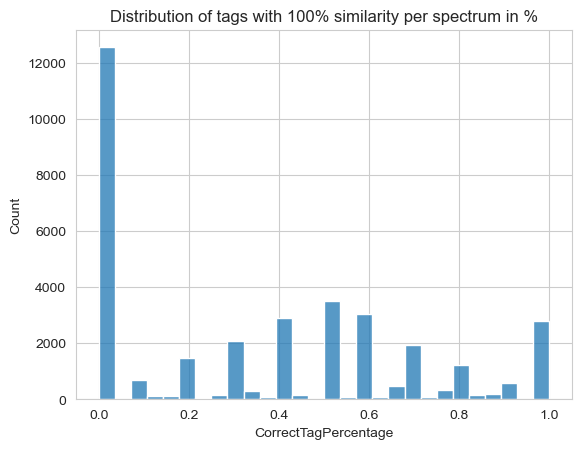

In [33]:
plt.figure()
ax = sns.histplot(correctTag_percentage_df["CorrectTagPercentage"])
ax.set_title("Distribution of tags with 100% similarity per spectrum in %")
plt.show()